In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# loading the json file into pandas dataframe
data=pd.read_json("data/jsondata.json",convert_dates=True)
data.head()

,added,country,end_year,impact,insight,intensity,likelihood,pestle,published,region,relevance,sector,source,start_year,title,topic,url
0,"January, 20 2017 03:51:25",United States of America,,,Annual Energy Outlook,6,3,Industries,"January, 09 2017 00:00:00",Northern America,2,Energy,EIA,,U.S. natural gas consumption is expected to in...,gas,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...
1,"January, 20 2017 03:51:24",United States of America,,,Annual Energy Outlook,6,3,Industries,"January, 09 2017 00:00:00",Northern America,2,Energy,EIA,,Reference case U.S. crude oil production is pr...,oil,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...
2,"January, 20 2017 03:51:23",United States of America,,,Annual Energy Outlook,6,3,Industries,"January, 09 2017 00:00:00",Northern America,2,Energy,EIA,,U.S. petroleum consumption is projected to rem...,consumption,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...
3,"January, 20 2017 03:26:40",Mexico,,,WRI Partnership Aims to Foster Supply Chain Tr...,6,2,Environmental,"January, 18 2017 00:00:00",Central America,3,Environment,sustainablebrands.com,,"Mars, Unilever, Cargill and MondelÄ“z are alre...",oil,http://www.sustainablebrands.com/news_and_view...
4,"January, 19 2017 00:55:54",,,,N-Hexane Market Hit at a CAGR of 5% by 2024 - ...,6,3,Economic,"January, 18 2017 00:00:00",World,2,,SBWire,,Polymerization will remain top 3 end-users in ...,market,http://www.sbwire.com/press-releases/n-hexane-...


In [7]:
data.columns

Index(['added', 'country', 'end_year', 'impact', 'insight', 'intensity',
       'likelihood', 'pestle', 'published', 'region', 'relevance', 'sector',
       'source', 'start_year', 'title', 'topic', 'url'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
added         1000 non-null object
country       1000 non-null object
end_year      1000 non-null object
impact        1000 non-null object
insight       1000 non-null object
intensity     1000 non-null object
likelihood    1000 non-null object
pestle        1000 non-null object
published     1000 non-null object
region        1000 non-null object
relevance     1000 non-null object
sector        1000 non-null object
source        1000 non-null object
start_year    1000 non-null object
title         1000 non-null object
topic         1000 non-null object
url           1000 non-null object
dtypes: object(17)
memory usage: 132.9+ KB


In [16]:
numeric_columns=['intensity','likelihood','relevance']
required_columns=['country','region','sector','source']
dates_columns=['added','published']

In [17]:
columns=dates_columns+required_columns+numeric_columns

In [20]:
data1=data[columns]

In [54]:
data['intensity'].astype(int)

ValueError: invalid literal for int() with base 10: ''

In [28]:
data1['intensity']=pd.to_numeric(data1['intensity'],errors='coerce')
data1['likelihood']=pd.to_numeric(data1['likelihood'])
data1['relevance']=pd.to_numeric(data1['relevance'])

C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
added         1000 non-null object
published     1000 non-null object
country       1000 non-null object
region        1000 non-null object
sector        1000 non-null object
source        1000 non-null object
intensity     962 non-null float64
likelihood    962 non-null float64
relevance     999 non-null float64
dtypes: float64(3), object(6)
memory usage: 70.4+ KB


In [31]:
data1.country.value_counts()

                            650
United States of America    112
Russia                       25
China                        24
India                        19
Iran                         19
Saudi Arabia                 18
Iraq                         11
Libya                        10
Indonesia                     9
Japan                         7
Canada                        6
Venezuela                     6
United Kingdom                6
Egypt                         6
Nigeria                       6
Brazil                        5
Australia                     4
Lebanon                       3
Mexico                        3
South Africa                  3
Germany                       3
Syria                         2
Ghana                         2
Jordan                        2
Colombia                      2
Ukraine                       2
Oman                          2
Malaysia                      2
Niger                         2
Spain                         2
Angola  

In [37]:
data1['country']=data1['country'].replace("","World")

C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


OPEC                                                                                                           43
Bloomberg Business                                                                                             36
DOE EIA 2013 Energy Conference                                                                                 35
CNNMoney                                                                                                       22
Resilience                                                                                                     21
World Bank Group                                                                                               19
Europa                                                                                                         18
Business Insider                                                                                               15
World Bank                                                                              

In [40]:
data1.country.isna().sum()

0

In [47]:
data1.intensity.describe()

count    962.000000
mean      10.238046
std        9.588543
min        1.000000
25%        4.000000
50%        8.000000
75%       12.000000
max       96.000000
Name: intensity, dtype: float64

In [60]:
data1['intensity']=data1['intensity'].fillna(data1['intensity'].mean()).astype(int)
data1['likelihood']=data1['likelihood'].fillna(data1['likelihood'].mean()).astype(int)
data1['relevance']=data1['relevance'].fillna(data1['likelihood'].mean()).astype(int)

C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [62]:
data1.describe(include='number')

,intensity,likelihood,relevance
count,1000.00000,1000.000000,1000.000000
mean,10.22900,3.159000,2.730000
std,9.40452,0.801474,1.196048
min,1.00000,1.000000,1.000000
25%,6.00000,3.000000,2.000000
50%,8.00000,3.000000,3.000000
75%,12.00000,4.000000,4.000000
max,96.00000,4.000000,7.000000


In [63]:
data1.pivot('country','sector','intensity')

ValueError: Index contains duplicate entries, cannot reshape

In [68]:
data1.drop_duplicates(['country','sector']).shape

(146, 9)

In [69]:
data1=data1.drop_duplicates(['country','sector'])

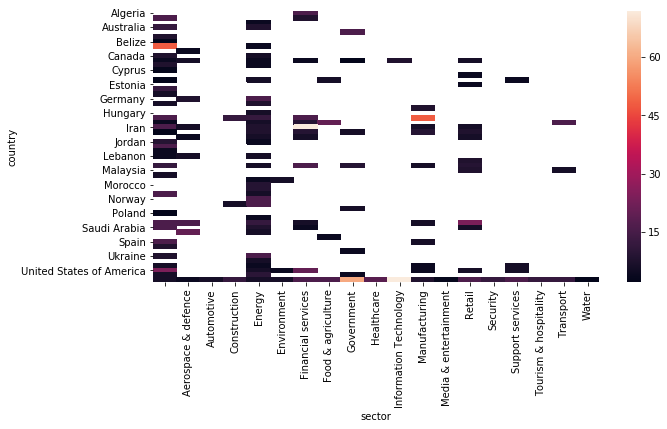

In [80]:
plt.figure (figsize=(10,5))
sns.heatmap(data1.pivot('country','sector','intensity'))

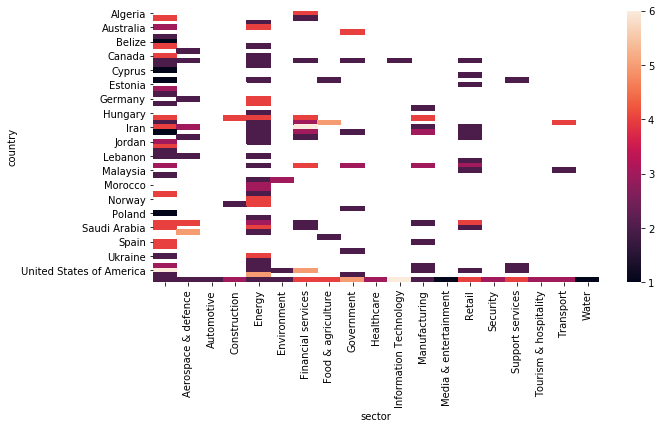

In [84]:
plt.figure (figsize=(10,5))
sns.heatmap(data1.pivot('country','sector','relevance'))

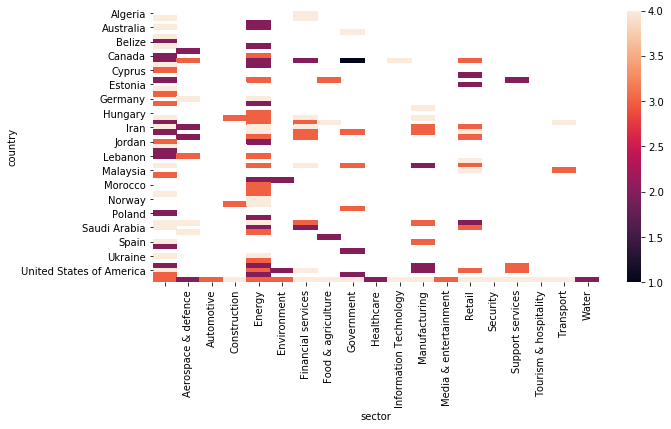

In [82]:
plt.figure (figsize=(10,5))
sns.heatmap(data1.pivot('country','sector','likelihood'))